In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from pythtb import *

### Normal model

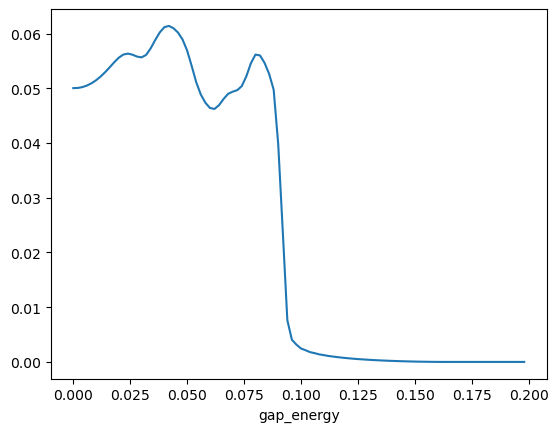

In [3]:
import os
import subprocess

#extremely small values when the Fermi level is -Asin(k1)

def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_double_gap_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0 + 0.002*index, -1*load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()
#

#### Single Weyl from magnetic Weyl semimetal

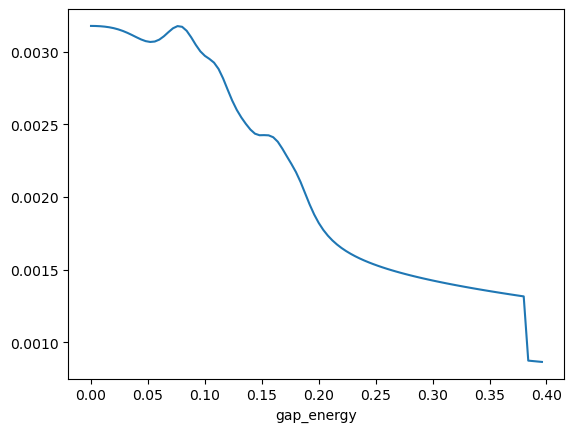

In [10]:
#energy = 0.2 
def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_single_Weyl_gap_analy.txt".format(energy))
    return data

s = []
for index in range(100):
    s.append([0 + 0.004*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()

#### Inversion symmetry breaking Weyl semimetal

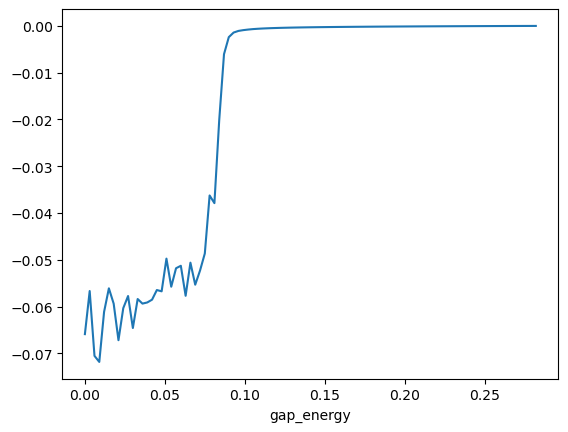

In [12]:
#energy = 0.2 
def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_inversion_breaking_gap_analy.txt".format(energy))
    return data

s = []
for index in range(95):
    s.append([0 + 0.003*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()

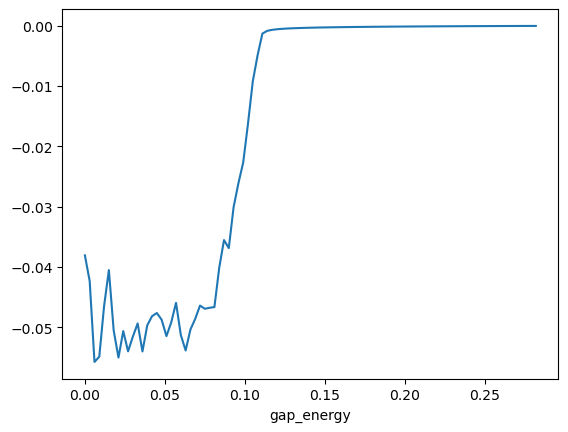

In [14]:
#energy = 0.3
def load_data(energy):
    data = np.loadtxt("sigma_xyz_{}_inversion_breaking_gap_analy_2.txt".format(energy))
    return data

s = []
for index in range(95):
    s.append([0 + 0.003*index, load_data(index)])

s = np.array(s)
fig, ax = plt.subplots()
plt.plot(s[:,0],s[:,1])
plt.xlabel("gap_energy")
plt.show()

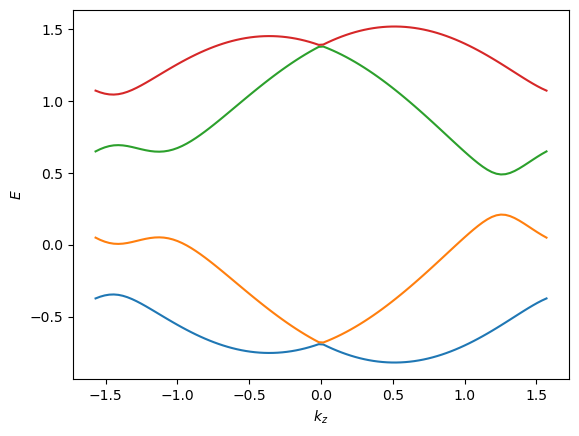

In [27]:
Terms = np.loadtxt("parameters_45_inversion_breaking_gap_analy_2.txt", dtype=complex)
from numba import jit

lattice  = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,2.0]], dtype = np.complex128)
position = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5],[0.0,0.0,0.5]], dtype = np.complex128)

@jit(nopython = True)
#Need to optimize this function and its derivatives
def Hk_double(kx, ky, kz, terms = Terms, lattice = lattice, position = position):
    h_k = np.zeros((4,4),dtype=np.complex128)
    k_vector = np.array([kx,ky,kz], dtype = np.complex128)
    for term in terms:
        R = term[3] * lattice[0] + term[4] * lattice[1] + term[5] * lattice[2] + position[int(term[2].real)] @ lattice - position[int(term[1].real)] @ lattice
        phase = term[0]*np.exp(-1j*np.dot(k_vector,R))
        h_k[int(term[2].real),int(term[1].real)] += phase
        h_k[int(term[1].real),int(term[2].real)] += phase.conjugate()
    return h_k


kx = 1.1*np.pi / 2
ky = 0
kz = np.linspace(-np.pi/2, np.pi/2, 100)

H_k = np.zeros((100, 4, 4), dtype=np.complex128)
for i, kz_val in enumerate(kz):
    H_k[i] = Hk_double(kx, ky, kz_val)

E_k = np.zeros((100, 4))
for i, hamiltonian in enumerate(H_k):
    E_k[i] = np.linalg.eigvalsh(hamiltonian)

plt.figure()
plt.plot(kz, E_k[:, 0])
plt.plot(kz, E_k[:, 1])
plt.plot(kz, E_k[:, 2])
plt.plot(kz, E_k[:, 3])
plt.xlabel(r'$k_z$')
plt.ylabel(r'$E$')
plt.show()